<a href="https://colab.research.google.com/github/smartfarmer1997/first-repository/blob/master/%ED%86%B5%EA%B3%84_%EB%A9%94%EC%9D%B8%ED%80%98%EC%8A%A4%ED%8A%B8_2%EC%9D%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel

### 문제 1)

- 빵집에서는 매일 아침에 구워지는 식빵 한 개의 평균 무게가 500g이 되도록 맞추고자 합니다.     
- 빵집 주인은 오늘 아침에 구운 식빵 중에서 **랜덤하게 25개**의 식빵을 샘플링하여 무게를 측정했습니다.
- 그 결과,**표본 평균은 495g, 표준편차는 10g**으로 나왔습니다.
- 빵집 주인이 목표한 500g의 무게를 충족하고 있는지(다시말해 목표 무게를 넘는지 안 넘는지)  **5%** 유의수준에서 검정해보세요


In [13]:
# 귀무가설은 표본 평균이 모평균과 같을 것이다.
# 대립가설은 표본 평균이 모평균을 같지 않을 것이다.

mu = 500
sample_mean = 495
sample_std = 10
n = 25
alpha = 0.05

t_statistic = (sample_mean - mu) / (sample_std / np.sqrt(n))

df = n - 1

p_value = stats.t.cdf(t_statistic, df) * 2

In [7]:
# help(stats.t)

In [14]:
# 결과 출력
if p_value < alpha:
    print(f"t-값: {t_statistic:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 기각합니다. 빵의 평균 무게는 목표와 다릅니다.")
else:
    print(f"t-값: {t_statistic:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 채택합니다. 빵의 평균 무게는 목표와 통계적으로 차이가 없습니다.")
'''
t-값: -2.5000, p-value: 0.0197. 유의수준 0.05에서 귀무가설을 기각합니다. 빵의 평균 무게는 목표와 다릅니다.
'''

t-값: -2.5000, p-value: 0.0197. 유의수준 0.05에서 귀무가설을 기각합니다. 빵의 평균 무게는 목표와 다릅니다.


'\nt-값: -2.5000, p-value: 0.0197. 유의수준 0.05에서 귀무가설을 기각합니다. 빵의 평균 무게는 목표와 다릅니다.\n'

### 문제2) 분포 시각화

문제 1번을 바탕으로 분포를 그리고 t통계량을 빨간색 점선으로, 초록색 점선으로 임계값을 기각역을 초록색으로 칠해보세요.

***기각역**:  통계량이 들어왔을 경우 귀무가설을 기각할 수 있는 영역을 말합니다.

Text(0.5, 1.0, 't-distribution')

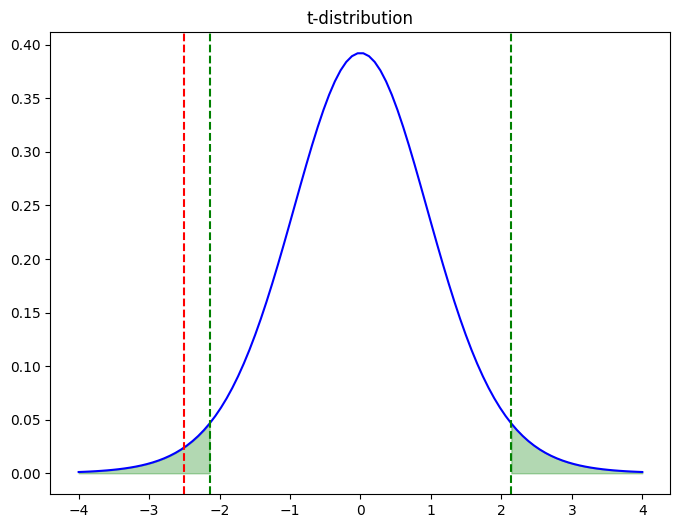

In [152]:
# t-분포 설정
x = np.linspace(-4, 4, 100)  # x축 범위
t_dist = stats.t.pdf(x, df)  # t-분포 확률 밀도 함수

# t-통계량
t_stat = -2.5

# 임계값 (양측 검정, 유의수준 0.05)
alpha = 0.05
critical_value = stats.t.ppf(1 - alpha/2, df)  # 양측 검정의 오른쪽 임계값
critical_value_left = -critical_value  # 왼쪽 임계값

# t-분포 곡선 그리기
plt.figure(figsize=(8, 6))
plt.plot(x, t_dist, 'b-', label='t-distribution')

# t-통계량 표시 (빨간색 점선)
plt.axvline(t_stat, color='red', linestyle='--', label='t-statistic')

# 임계값 표시 (초록색 점선)
plt.axvline(critical_value, color='green', linestyle='--', label='critical value')
plt.axvline(critical_value_left, color='green', linestyle='--')

# 기각역 색칠 (초록색)
plt.fill_between(x, t_dist, where=(x <= critical_value_left), color='green', alpha=0.3)
plt.fill_between(x, t_dist, where=(x >= critical_value), color='green', alpha=0.3)

# 그래프 설정
plt.title('t-distribution')


### 문제 3) 단일 t 표본 검정

- 어느 학교에서 새로운 교육 프로그램을 도입한 후 학생들의 수학 성적이 향상되었는지 확인하려고 합니다.
- 프로그램 도입 후 무작위로 선택한 16명의 학생들의 수학 성적 평균은 78점이고, 모집단의 평균은 75점입니다.
- 모집단의 표준편차는 알 수 없다고 합니다.
- 유의수준 0.05에서 이 교육 프로그램이 성적 향상에 효과가 있는지 단일 표본 t-검정을 실시하세요.


수업시간에 양측검정을 기준으로 배웠습니다. 다시말하면 데이터의 평균이 특정 값과 같은지 아닌지(방향은 관심없음)입니다. 문제는 향상에 효과가 있는지 에 대한 물음입니다. 함수를 무엇을 어떻게 넣어야할지 고민해보세요!(힌트 scipy docs 참고)

In [57]:
sample_scores = [79, 77, 80, 76, 78, 81, 75, 79, 77, 80, 78, 76, 82, 77, 79, 78]  # 예시 데이터

mu = 75
sample_mean = np.mean(sample_scores)
sample_std = np.std(sample_scores, ddof = 1)
n = len(sample_scores)
alpha = 0.05

t_stat = (sample_mean - mu) / (sample_std / np.sqrt(n))

df = n - 1

p_value = stats.t.pdf(t_stat, df)


print(sample_mean)

78.25


In [58]:
# 결과 출력
if p_value < alpha:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 기각합니다. 교육프로그램은 효과가 있습니다.")
else:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 채택합니다. 교육프로그램은 효과가 없습니다")
'''
t-값: 6.7890, p-value: 0.0000. 유의수준 0.05에서 귀무가설을 기각합니다. 교육프로그램은 효과가 있습니다.
'''

t-값: 6.7890, p-value: 0.0000. 유의수준 0.05에서 귀무가설을 기각합니다. 교육프로그램은 효과가 있습니다.


'\nt-값: 6.7890, p-value: 0.0000. 유의수준 0.05에서 귀무가설을 기각합니다. 교육프로그램은 효과가 있습니다.\n'

### 문제 4) 독립 표본 t 검정

- 한 연구소에서 두 가지 새로운 다이어트 프로그램의 효과를 비교하려고 합니다.
- 연구소는 두 그룹의 참가자들을 대상으로 12주간 다이어트 프로그램을 진행한 후 체중 감소량을 측정했습니다.
- 유의수준 5% 에서 두 그룹 간 평균 체중 감소량에 유의미한 차이가 있는지 독립 표본 t-검정을 실시하세요.    
    


관찰연구에서는  두개의 그룹을 t검정을 할때 등분산성을 검정하게 됩니다.  
scipy.stats.levene 문서를 읽고 등분산 검정 후 적절한 검정방법을 적용해보세요.     
등분산 검정에도 역시 귀무가설과 대립가설이 존재합니다.

In [134]:
# 그룹 A와 B의 체중 감소량 데이터
group_A = [5.1, 4.7, 6.2, 4.9, 5.3, 6.1, 5.0, 5.8, 4.8, 5.2]
group_B = [4.3, 4.1, 3.8, 4.6, 4.0, 4.5, 3.7, 4.2, 3.9, 4.4, 3.5, 4.3]

alpha = 0.05

_, p_value_levene = stats.levene(group_A, group_B)

if p_value_levene > 0.05:
    print('등분산성을 만족함')
else:
    print('만족하지 않음')

# 독립 이표본 t-테스트 수행
t_stat, p_value = ttest_ind(group_A, group_B, equal_var=True)


등분산성을 만족함


In [135]:
# 결과 출력
if p_value < alpha:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 기각합니다. 다이어트 프로그램은 효과가 있습니다.")
else:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 채택합니다. 다이어트 프로그램은 효과가 없습니다")
'''
t-값: 6.3898, p-value: 0.0000. 유의수준 0.05에서 귀무가설을 기각합니다. 다이어트 프로그램은 효과가 있습니다.'''

t-값: 6.3898, p-value: 0.0000. 유의수준 0.05에서 귀무가설을 기각합니다. 다이어트 프로그램은 효과가 있습니다.


'\nt-값: 6.3898, p-value: 0.0000. 유의수준 0.05에서 귀무가설을 기각합니다. 다이어트 프로그램은 효과가 있습니다.'

### 문제 5) 대응표본 t검정

<aside>
💡

대응표본 t-검정은 두 집단간 평균 차이를 비교할 때 사용되는 점은 독립 t검정 동일하나, 같은 집단에서 두 번 수집할 때 사용되는 검정입니다.( ex 고혈압 투여 전후 환자 단일 그룹의 혈압의 차) `scipy.stats` docs에서 적절한 함수를 찾아보고 적용해보세요.

</aside>

- 운동 프로그램 전후의 체중 변화를 분석하기 위해 10명의 참가자의 체중을 측정했습니다. 유의수준 5%에서 운동 프로그램이 체중 감소에 효과가 있는지 **대응 표본 t-검정**을 실시하세요.
- 또한, 대응표본t검정에서 등분산 검정이 필요한지 고민해봅시다.

In [65]:
# 운동 전후 체중 데이터
before = np.array([70, 80, 65, 90, 75, 85, 78, 82, 68, 73])
after = np.array([68, 78, 64, 88, 74, 83, 77, 80, 67, 72])

alpha = 0.05

t_stat, p_value = ttest_rel(before, after)

In [66]:
# 결과 출력
if p_value < alpha:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 기각합니다. 고혈압약은 효과가 있습니다.")
else:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 채택합니다. 고혈압약은 효과가 없습니다.")


'''
t-값: 9.0000, p-value: 0.0000. 유의수준 0.05에서 귀무가설을 기각합니다. 고혈압약은 효과가 있습니다.
'''

t-값: 9.0000, p-value: 0.0000. 유의수준 0.05에서 귀무가설을 기각합니다. 고혈압약은 효과가 있습니다.


'\nt-값: 9.0000, p-value: 0.0000. 유의수준 0.05에서 귀무가설을 기각합니다. 고혈압약은 효과가 있습니다.\n'

### 문제 6) 표본 추출

- Quest 05-01의  Online Retail II 데이터에서 표본을 추출하여 모집단의 평균을 추정해보세요.
- 영국(United Kingdom)에서 주문된 데이터 에서 30개, 100개, 300개의 샘플을 무작위 추출하여 평균 구매 금액(Total Price)를 계산해보세요.
- 표본의 크기가 커질 수록 모집단의 평균과 가까워지는지 확인해보세요.

In [67]:
import kagglehub
import os
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("mashlyn/online-retail-ii-uci")
print("Path to dataset files:", path)
retail = pd.read_csv(path + '/' + os.listdir(path)[0])
retail.head(3)

Path to dataset files: /kaggle/input/online-retail-ii-uci


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom


In [68]:
retail.describe()

,Quantity,Price,Customer ID
count,1.067371e+06,1.067371e+06,824364.000000
mean,9.938898e+00,4.649388e+00,15324.638504
std,1.727058e+02,1.235531e+02,1697.464450
min,-8.099500e+04,-5.359436e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13975.000000
50%,3.000000e+00,2.100000e+00,15255.000000
75%,1.000000e+01,4.150000e+00,16797.000000
max,8.099500e+04,3.897000e+04,18287.000000


In [69]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [88]:
# help(np.random.choice)

In [123]:
retail['Country'].unique()

array(['United Kingdom', 'France', 'USA', 'Belgium', 'Australia', 'EIRE',
       'Germany', 'Portugal', 'Japan', 'Denmark', 'Nigeria',
       'Netherlands', 'Poland', 'Spain', 'Channel Islands', 'Italy',
       'Cyprus', 'Greece', 'Norway', 'Austria', 'Sweden',
       'United Arab Emirates', 'Finland', 'Switzerland', 'Unspecified',
       'Malta', 'Bahrain', 'RSA', 'Bermuda', 'Hong Kong', 'Singapore',
       'Thailand', 'Israel', 'Lithuania', 'West Indies', 'Lebanon',
       'Korea', 'Brazil', 'Canada', 'Iceland', 'Saudi Arabia',
       'Czech Republic', 'European Community'], dtype=object)

In [99]:
uk_data = retail[retail['Country'] == 'United Kingdom']

In [100]:
uk_data['TotalPrice'] = uk_data['Quantity'] * uk_data['Price']

<ipython-input-100-da80d87b6e0a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uk_data['TotalPrice'] = uk_data['Quantity'] * uk_data['Price']


In [117]:
# TotalPrice_mean = uk_data['TotalPrice'].mean()
# sample_size30 = np.random.choice(uk_data['TotalPrice'], 30)
# sample_size100 = np.random.choice(uk_data['TotalPrice'], 100)
# sample_size300 = np.random.choice(uk_data['TotalPrice'], 300)

UK_TotalPrice_mean = uk_data['TotalPrice'].mean()
sample_size30 = uk_data['TotalPrice'].sample(30, random_state=42)
sample_size100 = uk_data['TotalPrice'].sample(100, random_state=42)
sample_size300 = uk_data['TotalPrice'].sample(300, random_state=42)

In [118]:
print(f"Raw data TotalPrice: {TotalPrice_mean:.2f}")
print(f"Sample size: 30, Mean TotalPrice: {sample_size30.mean():.2f}")
print(f"Sample size: 100, Mean TotalPrice: {sample_size100.mean():.2f}")
print(f"Sample size: 300, Mean TotalPrice: {sample_size300.mean():.2f}")
'''
Sample size: 30, Mean TotalPrice: 11.45
Sample size: 100, Mean TotalPrice: 25.33
Sample size: 300, Mean TotalPrice: 19.49
'''

Raw data TotalPrice: 16.69
Sample size: 30, Mean TotalPrice: 11.88
Sample size: 100, Mean TotalPrice: 16.09
Sample size: 300, Mean TotalPrice: 13.34


'\nSample size: 30, Mean TotalPrice: 11.45\nSample size: 100, Mean TotalPrice: 25.33\nSample size: 300, Mean TotalPrice: 19.49\n'

### 문제 7) 신뢰구간

- 영국 데이터에서 TotalPrice를 사용하여 95% 신뢰 구간을 계산하세요. 또한 표본의 크기가 30,100, 300으로 변하면서 신뢰구간이 변하는 형태를 확인해 보세요.
- Hint) `stats` 모듈에서 신뢰구간을 바로 구하는 함수를 확인해보세요.

In [119]:
# 신뢰 구간 계산 함수
def confidence_interval(data, confidence=0.95):
    mean = data.mean()
    std_err = stats.sem(data)
    interval = stats.t.interval(confidence, len(data)-1, loc=mean, scale=std_err)
    return mean, interval

print(confidence_interval(sample_size30))
print(confidence_interval(sample_size100))
print(confidence_interval(sample_size300))

(np.float64(11.881333333333334), (np.float64(6.37841466090658), np.float64(17.38425200576009)))
(np.float64(16.085399999999996), (np.float64(11.142955150004974), np.float64(21.02784484999502)))
(np.float64(13.344233333333333), (np.float64(11.264027626023802), np.float64(15.424439040642865)))


In [120]:

# 샘플 크기에 따른 신뢰 구간 비교
sample_sizes = [30, 100, 300]
for size in sample_sizes:
    sample = np.random.choice(uk_data['TotalPrice'], size)
    mean, interval = confidence_interval(sample)
    print(f"Sample size: {size}, Mean: {mean:.2f}, 95% CI: {interval}")

Sample size: 30, Mean: 12.24, 95% CI: (np.float64(8.416794073227692), np.float64(16.066539260105642))
Sample size: 100, Mean: 9.70, 95% CI: (np.float64(6.7160038810116856), np.float64(12.686396118988311))
Sample size: 300, Mean: 13.29, 95% CI: (np.float64(10.81997262227588), np.float64(15.767827377724121))


### 문제 8 가설검정 t-test

- 영국과 독일의 고객의 평균 구매금액(Total Price)가 동일한지 검정해보세요.
- 귀무가설과 대립가설을 세우고 통계검정을 통해 결과를 해석하세요
- 영국과 독일의 분포는 등분산성은 따른다고 가정

In [129]:
gm_data = retail[retail['Country'] == 'Germany']

In [130]:
gm_data['TotalPrice'] = gm_data['Quantity'] * gm_data['Price']
gm_data

<ipython-input-130-9d35314376dd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gm_data['TotalPrice'] = gm_data['Quantity'] * gm_data['Price']


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
579,489526,85049E,SCANDINAVIAN REDS RIBBONS,12,2009-12-01 11:50:00,1.25,12533.0,Germany,15.00
580,489526,21976,PACK OF 60 MUSHROOM CAKE CASES,24,2009-12-01 11:50:00,0.55,12533.0,Germany,13.20
581,489526,21498,RED SPOTS WRAP,25,2009-12-01 11:50:00,0.42,12533.0,Germany,10.50
582,489526,22077,6 RIBBONS RUSTIC CHARM,12,2009-12-01 11:50:00,1.65,12533.0,Germany,19.80
583,489526,84946,ANTIQUE SILVER TEA GLASS ETCHED,12,2009-12-01 11:50:00,1.25,12533.0,Germany,15.00
...,...,...,...,...,...,...,...,...,...
1067262,581578,22993,SET OF 4 PANTRY JELLY MOULDS,12,2011-12-09 12:16:00,1.25,12713.0,Germany,15.00
1067263,581578,22907,PACK OF 20 NAPKINS PANTRY DESIGN,12,2011-12-09 12:16:00,0.85,12713.0,Germany,10.20
1067264,581578,22908,PACK OF 20 NAPKINS RED APPLES,12,2011-12-09 12:16:00,0.85,12713.0,Germany,10.20
1067265,581578,23215,JINGLE BELL HEART ANTIQUE SILVER,12,2011-12-09 12:16:00,2.08,12713.0,Germany,24.96


In [146]:
print(uk_data['TotalPrice'].mean())
print(uk_data['TotalPrice'].std())
print(gm_data['TotalPrice'].mean())
print(gm_data['TotalPrice'].std())

16.69426584023722
303.0334005020126
23.717008681343625
36.7181097542096


In [150]:
'''
귀무가설 : 영국과 독일의 고객의 평균 구매 금액은 차이가 없다.
대립가설 : 영국과 독일의 고객의 평균 구매 금액은 차이가 있다.
'''


# 독립 표본 t-검정 (양측 검정, 등분산 가정)
t_stat, p_value = stats.ttest_ind(uk_data['TotalPrice'],gm_data['TotalPrice'], alternative='two-sided', equal_var=True)
print(t_stat)
print(p_value)

-3.0761750785304067
0.0020968035314750852


In [148]:
# 가설 검정 결과 해석
if p_value < 0.05:
    print("영국과 독일 고객의 평균 구매 금액에 유의한 차이가 있습니다.")
else:
    print("영국과 독일 고객의 평균 구매 금액에 유의한 차이가 없습니다.")

영국과 독일 고객의 평균 구매 금액에 유의한 차이가 있습니다.


# 2. A/B 테스트

문제 9~ 10)
- A/B test스타트업A에서 새로운 여행 패키지 상품 판매를 진행하고자 합니다.
- 패키지 판매 기획자는 새로운 패키지의 상품 판매 효율을 높이고 싶어하며,
- 이를 위해 기존에 상품이 판매되던 웹 페이지 (페이지 A) 가 아닌 새로운 웹 페이지 (페이지 B)를 통해 판매하고자 합니다.
- 패키지 판매 기획자는 신규 웹페이지 (페이지 B) 가 기존 (페이지 A) 대비 효과가 좋은 지 확인하기 위해 A/B 테스트를 진행하였습니다.

- 페이지 A: 기존에 운영하던 패키지 판매 웹 페이지
- 페이지 B: 새롭게 생성한 패키지 판매 웹 페이지

두 페이지는 스타트업A 패키지 판매 사이트에 접속하는 유저에게 랜덤으로 노출되었고, 테스트 결과는 다음과 같습니다.

## **문제9)**

- 결과를 바탕으로 패키지 기획자는 페이지 B의 효과에 대해 어떤 결정을 해야 할지 서술해 주세요.
- Hint) https://abtestguide.com/calc/  를 사용하여 해석해보세요

In [ ]:
'''
사이트 분석 결과는 p_value = 0.1031로 B페이지가 A페이지 대비 효과가 좋지 않은 것으로 나타났다.

하지만 B페이지에 대한 절대적인 노출 수가 적어서 B페이지의 노출 수가 더 늘어나면 결과는 달라질 것으로 예상한다.

예상에 대한 분석으로 B페이지의 노출 수와 구매 수를 동일하게 5배하여 진행해보았을 때 p_value = 0.011 로 나타났다.

따라서 현재 노출 수를 가지고 B페이지에 대해 판단하기는 시기상조라고 생각한다.

'''

## **문제 10)**

- A/B 테스트의 결과가 통계적으로 유의하나 효과의 차이 자체는 매우 작은 경우, 어떤 의사결정을 할 수 있을지 사례를 통해 설명해 주세요.
- Hint) A/B 관련 자료를 찾아보세요(추천 문헌 [요즘IT](https://yozm.wishket.com/))

In [ ]:
'''
문제에 대한 답은 포스팅 된 글중 (https://yozm.wishket.com/magazine/detail/585/) 이 글에 마지막 부분에 잘 서술 되어있다고 생각한다.

내용에 따르면 단순히 최종적인 지표가 별 차이가 없다고 해서 결과 또한 마찬가지는 아니다.
다음 AB 테스트를 위한 가설에 기여하는 AB 테스트도 많다.
예시로 이름과 이메일 주소 입력란을 두 화면으로 분리했던 대안이다.
해당 대안은 결과에서 큰 차이는 없었지만, 이름과 이메일의 각각의 이탈률에 차이를 알게했고 이메일 입력이 문제라는 것을 도출했다.

즉, 현재의 테스트가 효과는 적더라도 이를 바탕으로 추가적인 AB 테스트를 진행하는데 도움이 될 수 있을 것이라 생각한다.

'''

# KPT 회고
Keep : 제한시간 내에 마무리 했음에 감사함.

Problem : 출제된 문제의 상황이 실습때랑 조금의 차이임에도 불구하고 헤매는 과정을 보고 더 공부해야함을 느낌.

Try : 통계가 어렵긴해도 풀어나가는 성취감 있어서 재밌었고 통계를 더 공부해야함을 느낌.